In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')


print(df.head())
print(df.describe())


   CustomerID           Name  Age       Address  AccountBalance   LastLogin  \
0        1001  Customer 1001   54  Address 1001     9507.272060  01-01-2022   
1        1002  Customer 1002   35  Address 1002     7408.704536  02-01-2022   
2        1003  Customer 1003   40  Address 1003     1715.321989  03-01-2022   
3        1004  Customer 1004   30  Address 1004     3101.509134  04-01-2022   
4        1005  Customer 1005   46  Address 1005     5405.766914  05-01-2022   

   SuspiciousFlag  TransactionID  FraudIndicator Category  TransactionAmount  \
0               0              1               0    Other          79.413607   
1               0              2               0   Online          12.053087   
2               0              3               0   Travel          33.310357   
3               0              4               0   Travel          46.121117   
4               0              5               0    Other          54.051618   

      Amount         Timestamp  MerchantID  

In [10]:
print(df.columns)

Index(['Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag', 'TransactionID', 'FraudIndicator', 'Category',
       'TransactionAmount',
       ...
       'CustomerID_1991', 'CustomerID_1992', 'CustomerID_1993',
       'CustomerID_1994', 'CustomerID_1995', 'CustomerID_1996',
       'CustomerID_1997', 'CustomerID_1998', 'CustomerID_1999',
       'CustomerID_2000'],
      dtype='object', length=2662)


In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [29]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [31]:
df.head(1000)

,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator,Category,Amount,Timestamp,...,TransactionAmount_99.09515145,TransactionAmount_99.13454678,TransactionAmount_99.16801169,TransactionAmount_99.26625704,TransactionAmount_99.37033289,TransactionAmount_99.39547483,TransactionAmount_99.47675323,TransactionAmount_99.52235673,TransactionAmount_99.6010349,TransactionAmount_99.78432334
0,Customer 1001,54,Address 1001,9507.272060,01-01-2022,0,0,Other,55.530334,2022-01-01 00:00:00,...,False,False,False,False,False,False,False,False,False,False
1,Customer 1002,35,Address 1002,7408.704536,02-01-2022,0,0,Online,12.881180,2022-01-01 01:00:00,...,False,False,False,False,False,False,False,False,False,False
2,Customer 1003,40,Address 1003,1715.321989,03-01-2022,0,0,Travel,50.176322,2022-01-01 02:00:00,...,False,False,False,False,False,False,False,False,False,False
3,Customer 1004,30,Address 1004,3101.509134,04-01-2022,0,0,Travel,41.634001,2022-01-01 03:00:00,...,False,False,False,False,False,False,False,False,False,False
4,Customer 1005,46,Address 1005,5405.766914,05-01-2022,0,0,Other,78.122853,2022-01-01 04:00:00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Customer 1996,33,Address 1996,8523.485163,22-09-2024,0,0,Food,19.876750,2022-02-11 11:00:00,...,False,False,False,False,False,False,False,False,False,False
996,Customer 1997,58,Address 1997,9255.451757,23-09-2024,0,0,Retail,96.299792,2022-02-11 12:00:00,...,False,False,False,False,False,False,False,False,False,False
997,Customer 1998,25,Address 1998,9148.652759,24-09-2024,0,0,Food,75.164459,2022-02-11 13:00:00,...,False,False,False,False,False,False,False,False,False,False
998,Customer 1999,57,Address 1999,7376.854107,25-09-2024,0,0,Travel,93.633040,2022-02-11 14:00:00,...,False,False,False,False,False,False,False,False,False,False


In [89]:
selected_columns = ['Age', 'AccountBalance',
       'SuspiciousFlag', 'FraudIndicator', 'Amount', 'Timestamp']

In [53]:
selected_df = df[selected_columns]

In [47]:
selected_df = selected_df.dropna()

In [57]:
df['Timestamp'] = df['Timestamp'].astype('int64') // 10**9


In [61]:
numeric_columns = ['Age', 'AccountBalance', 'Amount', 'Timestamp', 'AnomalyScore']

In [62]:
selected_df_numeric = df[numeric_columns]

In [63]:
scaler = StandardScaler()

In [64]:
selected_df_scaled = scaler.fit_transform(selected_df_numeric)

In [65]:
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(selected_df_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [67]:
selected_df.loc[:, 'AnomalyScore'] = model.decision_function(selected_df_scaled)
selected_df.loc[:, 'AnomalyLabel'] = selected_df['AnomalyScore'].apply(lambda x: 1 if x < 0 else 0)


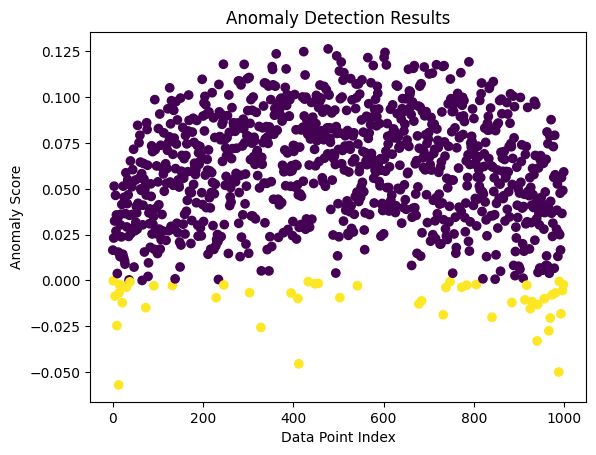

In [68]:
plt.scatter(selected_df.index, selected_df['AnomalyScore'], c=selected_df['AnomalyLabel'], cmap='viridis')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection Results')
plt.show()


In [87]:
anomalies = selected_df[selected_df['AnomalyLabel'] == 1]
print(anomalies)

     Age  AccountBalance  SuspiciousFlag  FraudIndicator     Amount  \
229   29     8998.835909               0               0  99.719234   
678   54     3796.236041               0               0  11.082270   
448   64     3495.320360               0               0  12.954726   
15    22     8612.857297               0               0  20.735039   
747   58     1787.742772               0               0  97.692353   
981   46     4575.522471               0               0  15.880654   
303   62     9631.517578               0               0  15.083583   
988   18     3448.958441               0               0  20.443811   
840   22     9319.481714               0               0  99.577661   
684   18     3046.120485               0               0  94.337502   
784   26     1549.517860               0               0  93.974769   
941   51     9839.150446               0               0  12.611479   
773   59     1765.177082               0               0  11.028018   
542   

In [70]:
X = selected_df.drop('AnomalyLabel', axis=1)
y = selected_df['AnomalyLabel']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train['Timestamp'] = pd.to_datetime(X_train['Timestamp']).astype('int64') // 10**9

In [75]:
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [77]:
X_test['Timestamp'] = pd.to_datetime(X_test['Timestamp']).astype('int64') // 10**9
y_pred = model.predict(X_test)

In [78]:
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
print(confusion_matrix(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))

[[183   7]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       190
           1       0.00      0.00      0.00        10

    accuracy                           0.92       200
   macro avg       0.47      0.48      0.48       200
weighted avg       0.90      0.92      0.91       200



In [88]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [90]:
def preprocess_data(df):
    selected_columns = ['CustomerID', 'Age', 'AccountBalance', 'LastLogin', 'SuspiciousFlag', 'TransactionAmount', 'Amount', 'Timestamp']

In [91]:
selected_df = df[selected_columns]

In [92]:
selected_df = selected_df.dropna()

In [93]:
 selected_df['Timestamp'] = pd.to_datetime(selected_df['Timestamp']).astype('int64') // 10**9

In [96]:
def train_anomaly_detectors(selected_df):
    scaler = StandardScaler()
    selected_df_scaled = scaler.fit_transform(selected_df)


In [100]:
def predict_anomalies(models, selected_df):
    isolation_forest, one_class_svm, lof = models
selected_df['IsolationForest'] = isolation_forest.predict(selected_df_scaled)
    selected_df['OneClassSVM'] = one_class_svm.predict(selected_df_scaled)
    selected_df['LOF'] = lof.fit_predict(selected_df_scaled)

    return selected_df

IndentationError: unexpected indent (544787051.py, line 4)